<a href="https://colab.research.google.com/github/JulianSKYOO/ML_NN/blob/main/(2024_10)%5Bkeras%5DSequential_NLP_from_stratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="1"></a>
## 1 - Necessary Imports

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import string
import re
import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, twitter_samples, wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.decomposition import PCA

%matplotlib inline

In [ ]:
stopwords_english = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [ ]:
def pos_tag_convert(nltk_tag: str) -> str:
    """Converting nltk tags to understandable tags by the wordnet lemmatizer
    Args: nltk_tag (str)- nltk tag
    Returns: _ (str) - converted tag
    """
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def process_tweet(tweet):
    """
    Input: tweet - string of a tweet
    Output: tweets_clean - a list of processed tweet
    """
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text 'RT'
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtag in the first place of the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False,
                               strip_handles=True, reduce_len=True)
    tweet_tokens = nltk.pos_tag(tokenizer.tokenize(tweet))

    tweets_clean = []
    for word in tweet_tokens:
        if (word[0] not in stopwords_english and
            word[0] not in string.punctuation):
            stem_word = lemmatizer.lemmatize(word[0], pos_tag_convert(word[1]))
            tweets_clean.append(stem_word)
    return tweets_clean

In [ ]:
def load_tweet_data():
    all_positive_tweets = twitter_samples.strings('positive_tweets.json')
    all_negative_tweets = twitter_samples.strings('negative_tweets.json')
    return all_positive_tweets, all_negative_tweets

<a name="2"></a>
## 2. Data processing

In [ ]:
# check the total number of data
all_positive_tweets, all_negative_tweets = load_tweet_data()
print(f'num pos: {len(all_positive_tweets)}, num neg: {len(all_negative_tweets)}')

num pos: 5000, num neg: 5000


In [ ]:
# check the examples
print(f'pos example: {all_positive_tweets[35]}')
print(f'neg example: {all_negative_tweets[35]}')

pos example: @jamiefigsxx  follow @jnlazts &amp; http://t.co/RCvcYYO0Iq follow u back :)
neg example: MY $$$$2 DOLLAR :( 😭😭😭😭😭😭 http://t.co/oI0pYGUsDi


Needs to be processed due to the hyperlinks

In [ ]:
# process the tweets
processed_pos_tweets = [process_tweet(tweet) for tweet in all_positive_tweets]
processed_neg_tweets = [process_tweet(tweet) for tweet in all_negative_tweets]

print(f"pos example: {processed_pos_tweets[35]}")
print(f"neg example: {processed_neg_tweets[35]}")

pos example: ['follow']
neg example: ['dollar', ':(', '😭', '😭', '😭']


In [ ]:
# split both tweets into train and test test_size = 0.2
train_pos = processed_pos_tweets[:4000]
test_pos = processed_pos_tweets[4000:]
train_neg = processed_neg_tweets[:4000]
test_neg = processed_neg_tweets[4000:]

X_train = train_pos + train_neg
X_test = test_pos + test_neg

# 1 for pos 0 for neg
y_train = [[1] for _ in train_pos] + [[0] for _ in train_neg]
y_test = [[1] for _ in test_pos] + [[0] for _ in test_neg]

print(f'Train: pos: {len(X_train)}, neg: {len(y_train)} sentences')
print(f'Test: pos: {len(X_test)}, neg: {len(y_test)} sentences')

Train: pos: 8000, neg: 8000 sentences
Test: pos: 2000, neg: 2000 sentences


In [ ]:
# make dictionary from the given data
def make_vocab(corpus):
    """Make vocabulary dictionary from the given corpus
    Input: corpus (list) - corpus
    Output: vocab (dict) - key: word, value: index
    """
    vocab = {'[UNK]': 0}
    for tweet in corpus:
        for word in tweet:
            if word not in vocab:
                vocab[word] = len(vocab)

    return vocab

In [ ]:
vocab = make_vocab(X_train)
vocab

{'[UNK]': 0,
 'followfriday': 1,
 'top': 2,
 'engage': 3,
 'member': 4,
 'community': 5,
 'week': 6,
 ':)': 7,
 'hey': 8,
 'james': 9,
 'odd': 10,
 ':/': 11,
 'please': 12,
 'call': 13,
 'contact': 14,
 'centre': 15,
 '02392441234': 16,
 'able': 17,
 'assist': 18,
 'many': 19,
 'thanks': 20,
 'listen': 21,
 'last': 22,
 'night': 23,
 'bleed': 24,
 'amazing': 25,
 'track': 26,
 'scotland': 27,
 'congrats': 28,
 'yeaaah': 29,
 'yipppy': 30,
 'accnt': 31,
 'verify': 32,
 'rqst': 33,
 'succeed': 34,
 'get': 35,
 'blue': 36,
 'tick': 37,
 'mark': 38,
 'fb': 39,
 'profile': 40,
 '15': 41,
 'day': 42,
 'one': 43,
 'irresistible': 44,
 'flipkartfashionfriday': 45,
 'like': 46,
 'keep': 47,
 'lovely': 48,
 'customer': 49,
 'wait': 50,
 'long': 51,
 'hope': 52,
 'enjoy': 53,
 'happy': 54,
 'friday': 55,
 'lwwf': 56,
 'second': 57,
 'thought': 58,
 '’': 59,
 'enough': 60,
 'time': 61,
 'dd': 62,
 'new': 63,
 'short': 64,
 'enter': 65,
 'system': 66,
 'sheep': 67,
 'must': 68,
 'buy': 69,
 'jgh': 

### Change each tweet into a tensor
- transform the tokens to integers and pad the tensors to have equal length.
- tweets not in voab to the unique ID `[UNK]`

In [ ]:
max_len = max([len(t) for t in X_train + X_test])

In [ ]:
def padded_seq(tweet, vocab, max_len, unk_token='[UNK]'):
    """ transform squences to padded squences of numbers
    Args: tweet (list) - tweet
          vocab (disct) - vocabulary
          max_len (int) - max length of tweet
          unk_token (str) - unkown token
    Returns: padded_tensor (list) - padded tweet as a list of integer.
    """
    # ID of UNK token in case of encountering a new word.
    unk_ID = vocab[unk_token]

    # transform the words to integers in vocab
    tweets_ID = [vocab.get(word, unk_ID) for word in tweet]

    # pad the tensor with zeros up to longest length of tweet
    padded_tensor = tf.keras.preprocessing.sequence.pad_sequences(
        [tweets_ID], maxlen=max_len, padding='post', truncating='post'
    )[0]

    return padded_tensor

In [ ]:
X_train_padded = [padded_seq(tweet, vocab, max_len) for tweet in X_train]
X_test_padded = [padded_seq(tweet, vocab, max_len) for tweet in X_test]
X_train_padded

[array([1, 2, 3, 4, 5, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,  7, 19, 20,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       dtype=int32),
 array([21, 22, 23,  7, 24, 25, 26, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       dtype=int32),
 array([28,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       dtype=int32),
 array([29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,  7

<a name="3"></a>
## 3 Structure of layers

### ReLU
: activation function to keep the network stable

$$g(z^{[i]}) = max(0, z^{[i]})$$
![ReLU](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/ReLU_and_GELU.svg/440px-ReLU_and_GELU.svg.png)

## Sigmoid
: activation function for binary classification
$$logistic(x) \frac{1}{1+e^{(-x)}}$$

## Dense
: layer where the machine learns with a set of the parameters

$$z^{[i]} = W^{[i]}\cdot a^{[i-1]}$$

In [ ]:
z = np.array([[1.0, 10.0, 30.0]])

dense_layer = tf.keras.layers.Dense(1, input_shape=z.shape, activation='relu')
a = dense_layer(z)
a

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[16.123518]], dtype=float32)>

<a name="4"></a>
## Model

- [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) Turns positive integers into vectors of fixed size such like one-hot encoded vectors.
- [GlobalAveragePooling1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling1D)
- [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

In [ ]:
def create_model(vocab_size, embedding_dim, max_len, seed):
    """ Creating a text classifier model
    Args: vocab_size (int) - size of the vocab for embedding layer input
          embedding_dim (int) - dimensionality of the embedding layer output
          max_len (int) - length of the input sequence
          seed (int) - seed for random initialization and reproducibility
    Returns: model (tf.keras.Model) - text classifier model
    """

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                  input_length=max_len),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(1, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [ ]:
model = create_model(vocab_size=len(vocab), embedding_dim=16, max_len=max_len, seed=42)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
X_train_prepared = np.array(X_train_padded)
X_test_prepared = np.array(X_test_padded)

y_train_prepared = np.array(y_train)
y_test_prepared = np.array(y_test)

history = model.fit(X_train_prepared, y_train_prepared, validation_data=(X_test_prepared, y_test_prepared), epochs=20)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5379 - loss: 0.7076 - val_accuracy: 0.7970 - val_loss: 0.6760
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6986 - loss: 0.6615 - val_accuracy: 0.9920 - val_loss: 0.5937
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9839 - loss: 0.5438 - val_accuracy: 0.9965 - val_loss: 0.3823
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9854 - loss: 0.3161 - val_accuracy: 0.9960 - val_loss: 0.1619
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9932 - loss: 0.1167 - val_accuracy: 0.9940 - val_loss: 0.0581
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9933 - loss: 0.0465 - val_accuracy: 0.9950 - val_loss: 0.0323
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9929 - loss: 0.0424 - val_accuracy: 0.9950 - val_loss: 0.0243
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9953 - loss: 0.0300 - val_accuracy: 0.

<a name="5"></a>
## 5 Evaluation

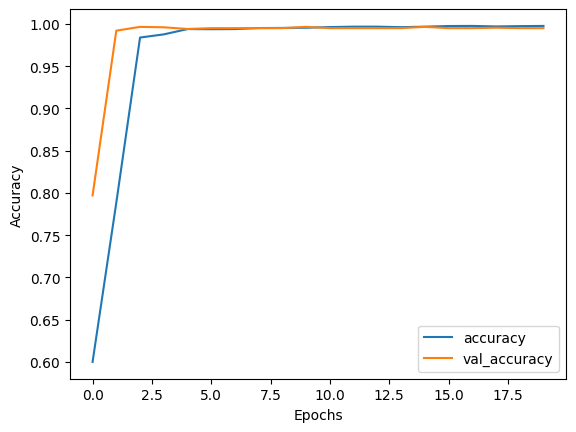

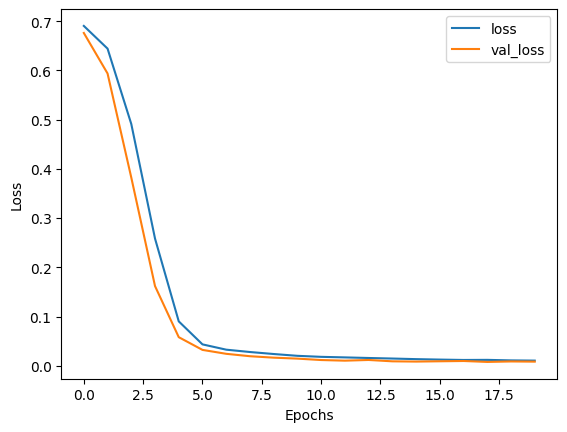

In [ ]:
def plot_metrics(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_metrics(history, 'accuracy')
plot_metrics(history, 'loss')

## Prediction

In [ ]:
# 5 examples from each positive and negative tweets.
example = np.append(X_test_prepared[:5], X_test_prepared[-5:], axis=0)

# Model prediction
model.predict(example)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


array([[1.2276343],
       [1.3593607],
       [1.3434207],
       [1.236523 ],
       [1.3488173],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ]], dtype=float32)

## Testing

In [ ]:
def predict_tweet(tweet, vocab, model, max_len):
    tweet = process_tweet(tweet)
    tweet = padded_seq(tweet, vocab, max_len)
    tweet = np.array([tweet])

    prediction = model.predict(tweet, verbose=True)

    return prediction[0][0]

In [ ]:
new_tweet = 'Great energy from @SpaceX fans in Mexico'

prediction_new = predict_tweet(new_tweet, vocab, model, max_len)
prediction_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


0.90830696

In [ ]:
embeddings = model.layers[0].get_weights()[0]
pca = PCA(n_components=2)
embed_2D = pca.fit_transform(embeddings)

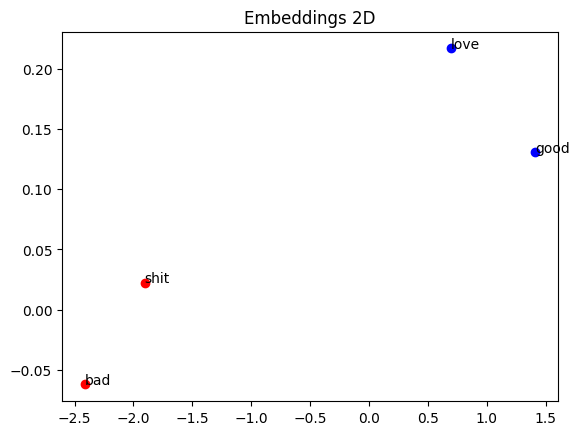

In [ ]:
pos_words = ['good', 'love']
neg_words = ['bad', 'shit']

pos_n = [vocab[w] for w in pos_words]
neg_n = [vocab[w] for w in neg_words]

plt.scatter(embed_2D[neg_n][:, 0], embed_2D[neg_n][:,1], color='red')
for i, text in enumerate(neg_words):
    plt.annotate(text, (embed_2D[neg_n][i, 0], embed_2D[neg_n][i,1]))
plt.scatter(embed_2D[pos_n][:, 0], embed_2D[pos_n][:,1], color='blue')
for i, text in enumerate(pos_words):
    plt.annotate(text, (embed_2D[pos_n][i, 0], embed_2D[pos_n][i,1]))
plt.title('Embeddings 2D')
plt.show()